## 1. MNIST Dataset
- MNIST dataset은 Keras에서 download할 수 있고 4종류$(train\_images, train\_labels, test\_images, test\_labels)$의 Numpy arrays로 download할 수 있음

- MNIST Dataset은 supervised dataset임 <br> 
$ \ \ $ $\checkmark \ $ 손글씨 image: 28×28 pixel data<br> 
$ \ \ $ $\checkmark \ $ 정답인 Label data로 구성됨 

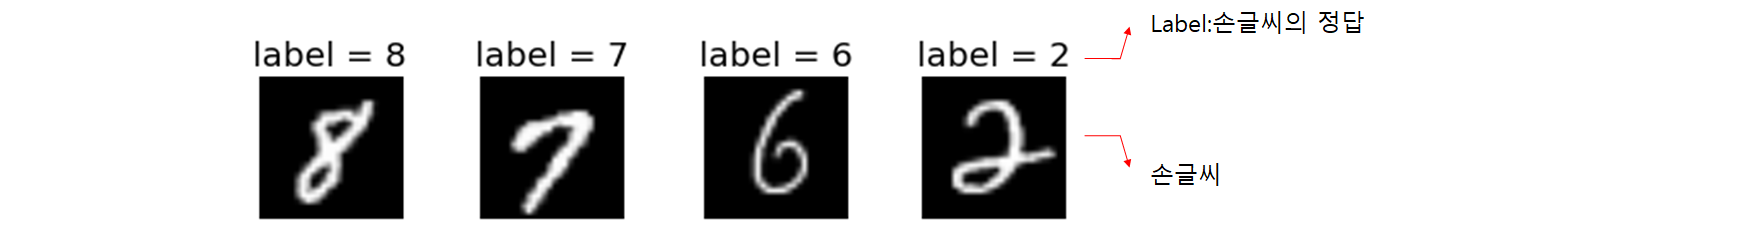

- 각 손글씨는 28X28개의 pixcel을 가지고 있고 각 pixel 값은 흰색을 의미하는 0부터 검은색인 255까지  [0, 255] 사이의 화소값을 가지고 있음

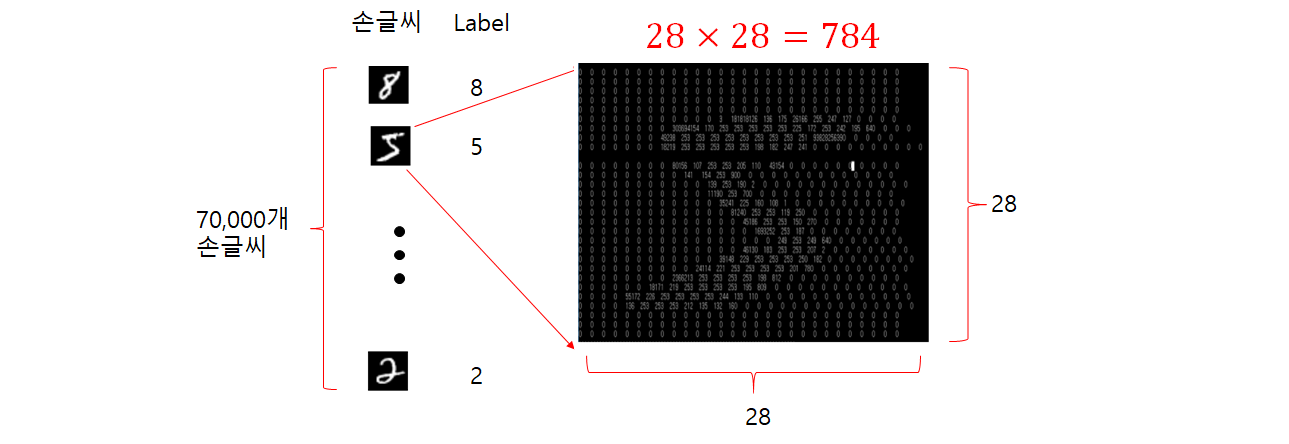

## 2. MNIST Dataset 문제
- 784개 화소로 구성된 [0, 9] 사이의 손글씨의 특성을 찾아 10개의 Class로 구분하는 문제임


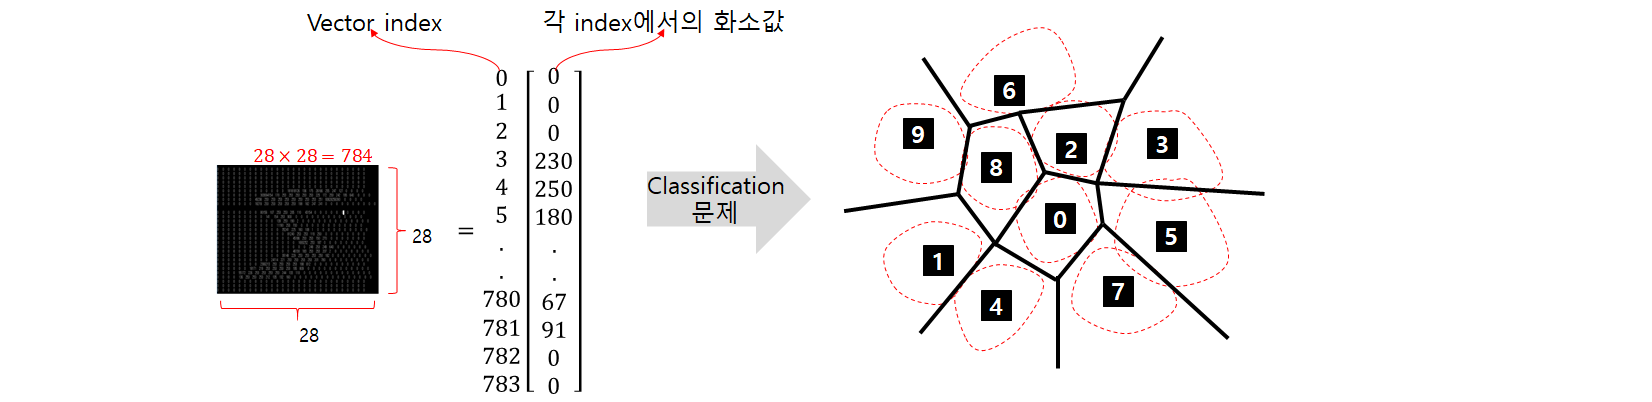

## 3. Library, Package, Module import 

In [1]:
import keras
keras.__version__

from keras import models
from keras import layers

from keras.datasets import mnist

## 4. MNIST Dataset Loading

### 4.1 Dataset Loading 및 Train, Test dataset 분할
- load_data() 함수를 호출하면 네 개의 넘파이(NumPy) 배열이 반환됩

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### 4.2 Data 탐색

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels.shape

(60000,)

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### 4.3 Loading image의 확인

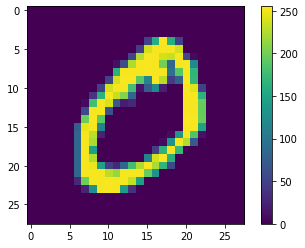

In [10]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[1])  # train_image의 첫번째 data
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_labels[1]

0

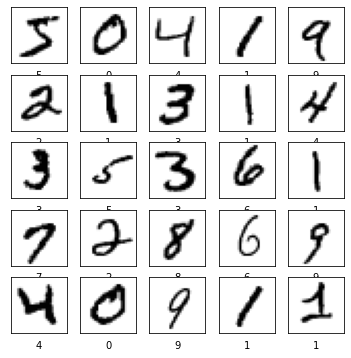

In [12]:
plt.figure(figsize=(6,6))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

### 4.4 Data 전처리(Preprocessing)

In [13]:
#train_images[0]

In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [15]:
#train_images[0]

## 5. Keras Model 구성

In [16]:
network = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

- tf.keras.layers.Flatten은 2차원 배열(28 x 28 픽셀)의 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환 <br>
\- 이 층은 이미지에 있는 픽셀의 행을 펼쳐서 일렬로 늘림<br>
\- 이 층에는 학습되는 가중치가 없고 데이터를 변환하기만 함<br>
\- $28 \times 28$ input image  $\Longrightarrow$  $784$

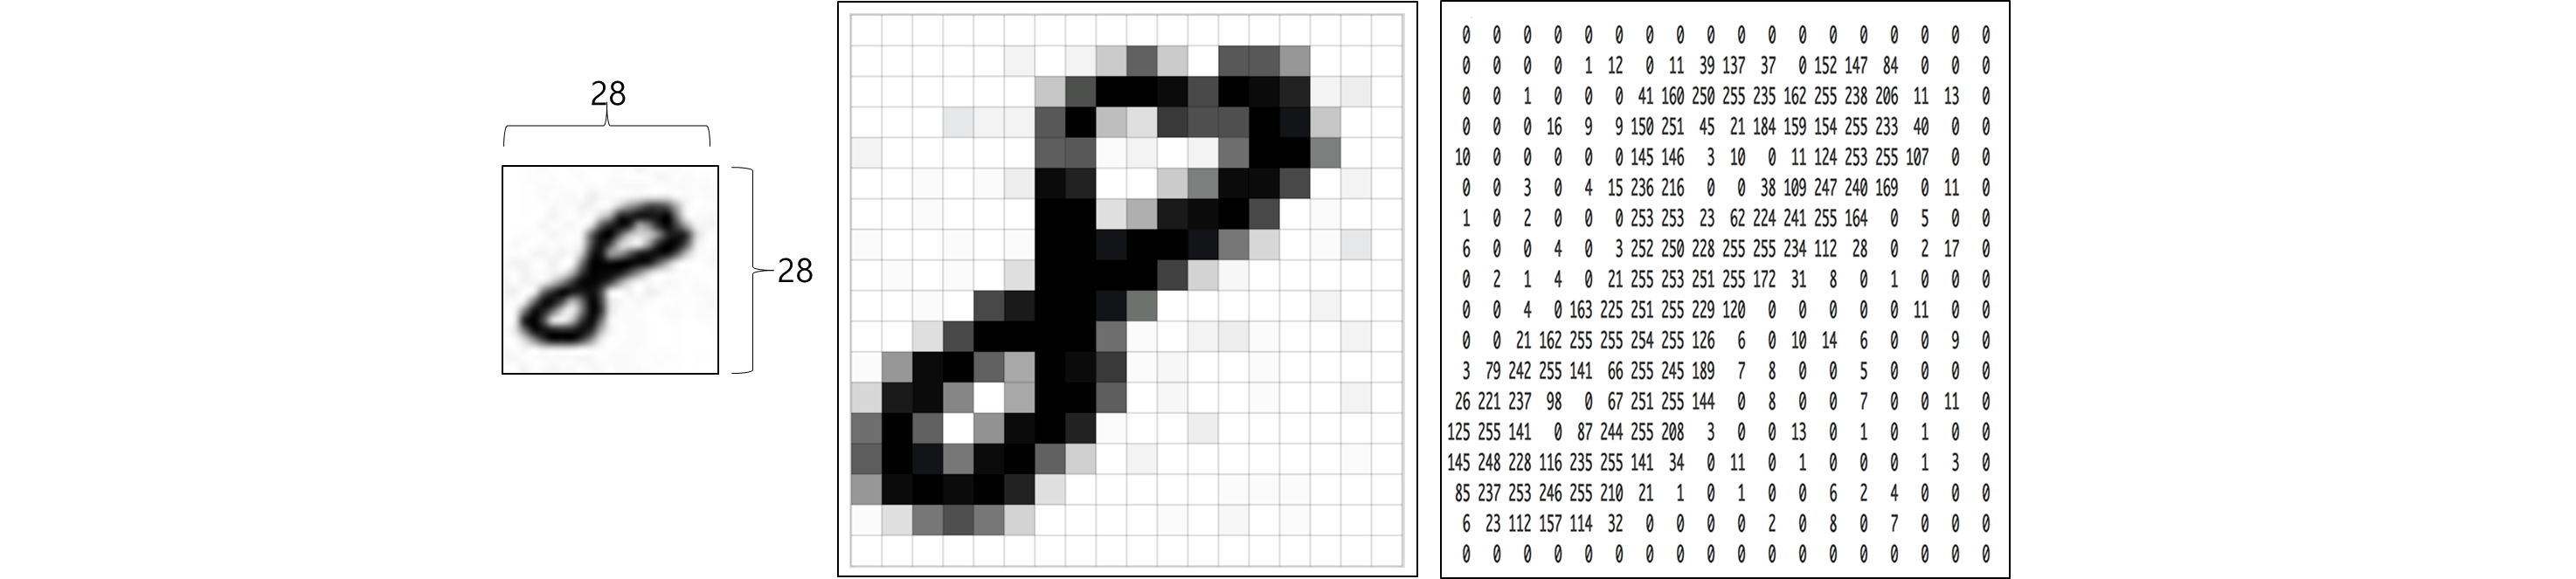

- tf.keras.layers.Flatten은 2차원 배열(28 x 28 픽셀)의 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환 <br>
\- 이 층은 이미지에 있는 픽셀의 행을 펼쳐서 일렬로 늘림<br>
\- 이 층에는 학습되는 가중치가 없고 데이터를 변환하기만 함<br>
- 픽셀을 펼친 후에는 두 개의 tf.keras.layers.Dense 층이 연속되어 연결됨<br>
\- 이 층을 밀집 연결(densely-connected) 또는 완전 연결(fully-connected) 층이라고 부름<br>
\- 첫 번째 Dense 층은 512개의 Node(또는 Neuron)를 가짐<br>
- 마지막 층은 10개의 Node의 소프트맥스(softmax) 층임<br>
\- 이 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1임<br>
\- 각 Node는 현재 Image가 10개 Class 중 하나에 속할 확률을 출력

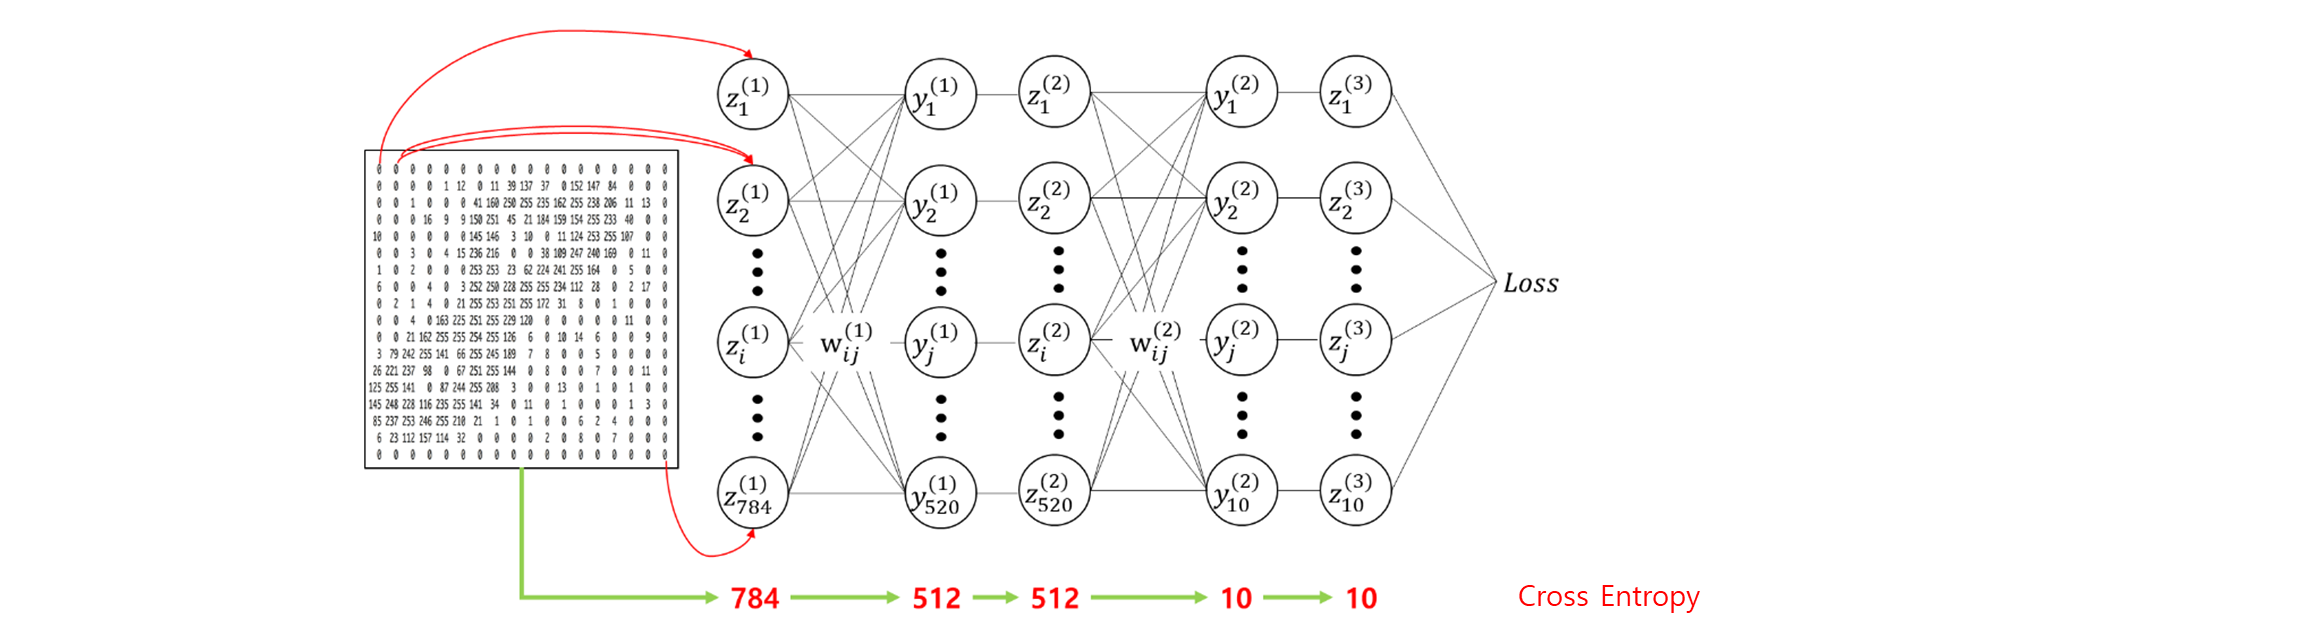

- 지도학습 Deep Neural Network으로 순방향(forward propagation)하는 것은 일종의 표현학습(representative learning) 과정으로 볼 수 있음<br>
$\quad$ (1) 순방향 마지막 layer은 일반적으로 선형분류기(보통 softmax를 사용함)이고, <br>
$\quad$ (2) 나머지 layer들은 표현(representative)을 제공하는 방법을 학습하는 과정으로 이해할 수 있음<br>
$\quad$ (3) MNIST data를 $784차원 \ \rightarrow \ 512차원 \ \rightarrow \ 10차원$보내어 분류하는 문제는 다음과 같은 과정을 따르는 것임 

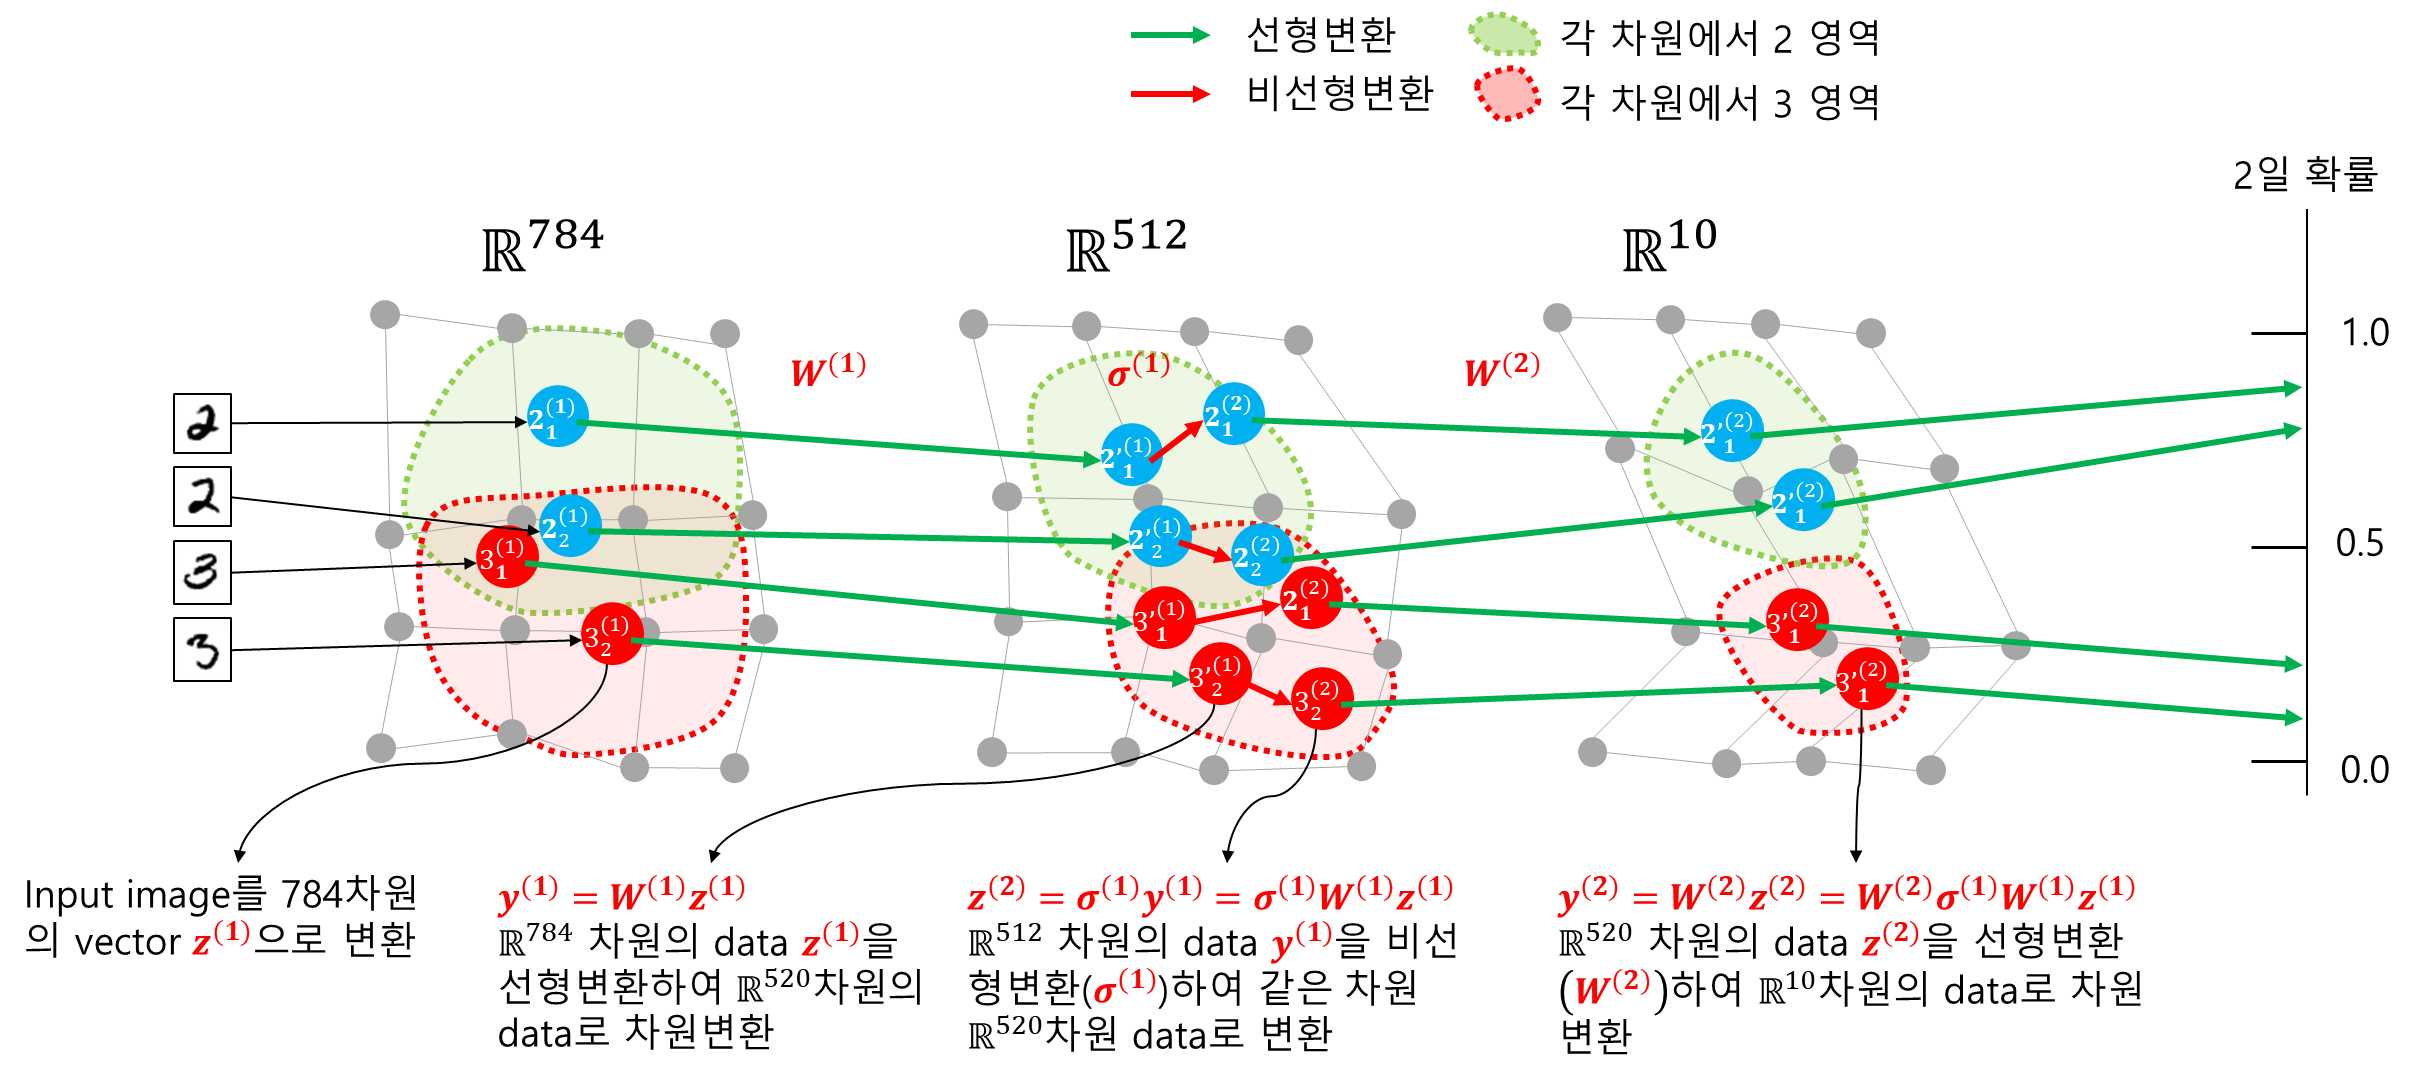

> $\bullet \ $ 즉 MNIST 분류문제 풀이과정은 <br><br>
>
>$\quad$  (i) 우리의 눈으로 보이는 $28 \times 28$ pixel  image data를 <br>
$\quad$ (ii)  Flatten하여 784차원의 한 점(point)으로 나타(표현)내고 <br>
$\quad$ (iii) 784차원의 point를 행렬 $W^{(1)}$를 이용하여  512차원의 한 point로 다르게 표현하고 <br>
$\qquad$ $\checkmark$ 행렬 $W^{(1)}$와 784차원 벡터의  곱은 다음 3가지를 의미함<br>
$\qquad \quad $ $\cdot \ $ 784차원 벡터의 크기를 변화시키고 회전시키는 선형변환과<br>
$\qquad \quad $ $\cdot \ $ $W^{(1)}_{784 \times 512}$를 이용한 행렬곱은 주어진 784차원의 data를 784차원에서  512차원의 data로 차원변환을 의미함<br>
$\qquad$ $\checkmark$ 또한, 이 때 사용한 $W^{(1)}$는 loss function을 최소화하는 $W$임<br>
$\quad$  (iv)  512차원 내에서 비선형변환 함수인 activation function $\sigma^{(1)}$을 이용하여 같은 차원 내의 다른 point로 이동하고(표현을 바꾸고)<br>
$\quad$  (v)  같은 방법으로 각 layer를 지나갈 때 (iii)과 (iv)를 반복하는 과정을 이용하는 <br>
$\quad$  (vi) data의 표현(representation)을 바꾸어 분류문제를 풀이한 것이라고 볼 수 있음

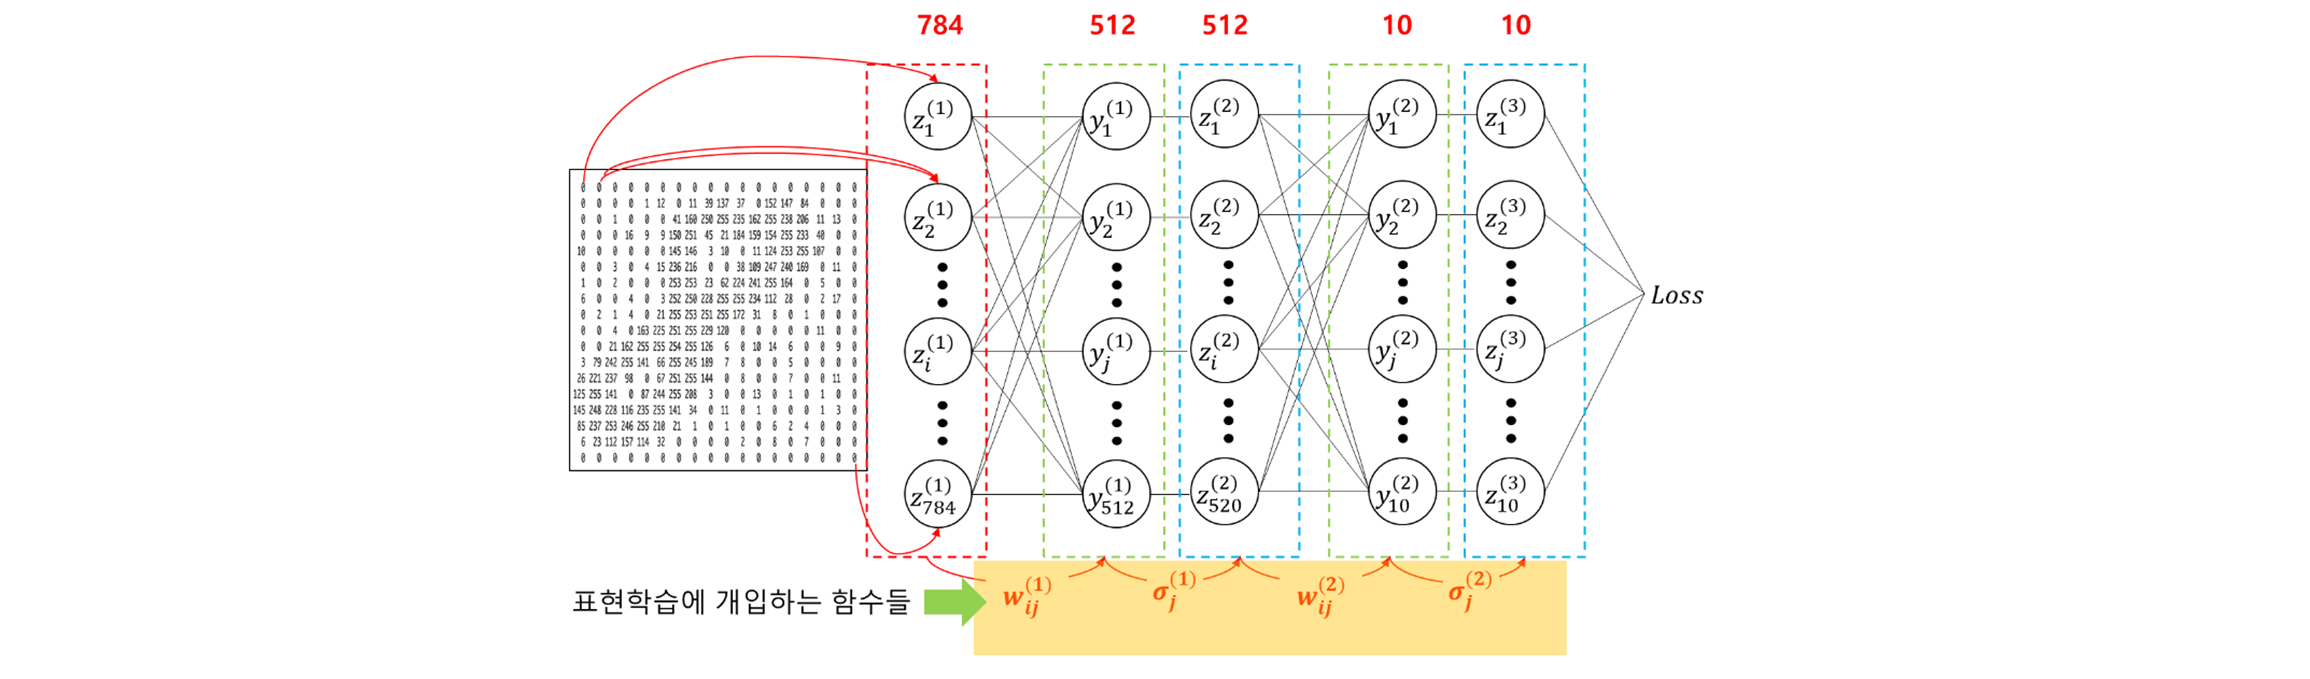

- 다른 Architecture를 이용한 MNIST Classification문제<br>
\- 다른 architecture를 사용하는 경우 분류의 성능이 다른 것을 볼 수 있는데 이 관점은 다음 2가지 방법으로 해석할 수 있음<br><br>

#### $\quad$ [해석 1]

$\qquad$- input data의 표현방법에 따른 solution 성능차이

#### $\quad$ [해석 2]
$\qquad$- 다른 critical point에  도달

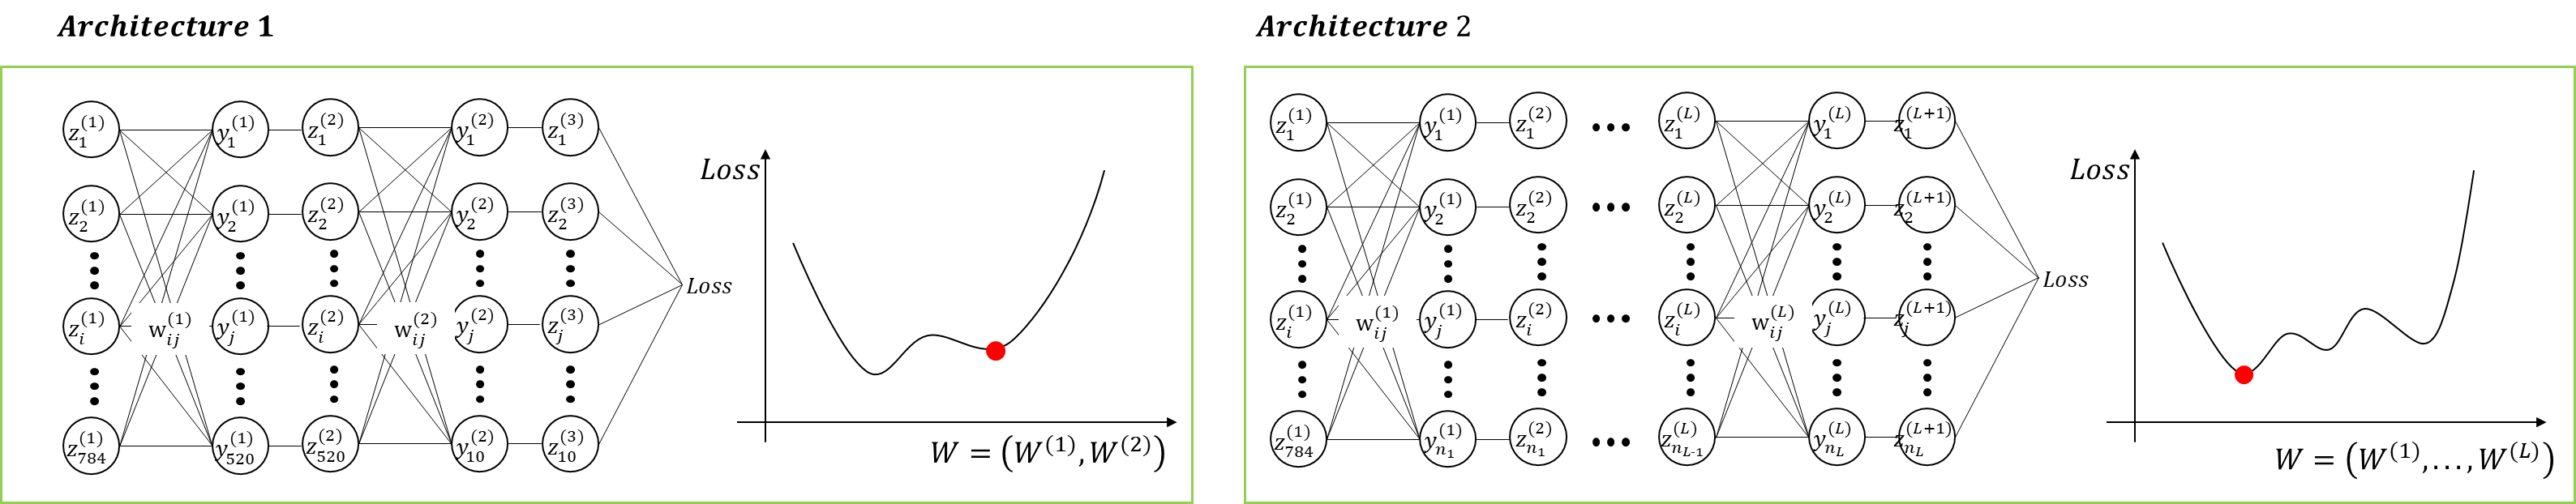

### 5.2 Model Compile
- compile<br>
\- optimizer: 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정<br>
\- loss function: 훈련 하는 동안 모델의 오차를 측정<br>
\- Metrics: 훈련 단계와 테스트 단계를 모니터링하기 위해 사용

In [17]:
network.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 6. Keras Model 훈련
1. Training Dataset을 Model에 주입
   1. 이 예에서는 train_images와 train_labels 배열임
1. Model이 Image와 Label을 Mapping하는 방법을 학습
1. Test Datset에 대한 Model Prediction을 수행
   1. 이 예에서는 test_images 배열이 입력되면 training 결과인 parameter값을 이용하여 test dataset에 대한 label을 예측하고 참값 label과 비교

In [18]:
#network.fit(train_images, train_labels, epochs=10, batch_size=128)
network.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1986 - accuracy: 0.9408
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0792 - accuracy: 0.9754
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0512 - accuracy: 0.9836
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0370 - accuracy: 0.9886
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0256 - accuracy: 0.9916
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0202 - accuracy: 0.9930
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0175 - accuracy: 0.9938
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0142 - accuracy: 0.9956
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0115 - accuracy: 0.9965
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.011

## 7. Keras Model  정확도 평가
- Test Dataset의 정확도(Accuracy)가 Training Dataset의 정확도(Accuracy)보다 조금 낮음
- Training Dataset의 정확도와 Test Dataset의 정확도 사이의 차이는 과대적합(overfitting) 때문임
- 대적합(overfitting)은 Machine Learning Model이 Training Dataset보다 새로운 data에서 성능이 낮아지는 현상을 말함

In [19]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0794 - accuracy: 0.9815


In [20]:
print('test_acc:', test_acc)

test_acc: 0.9815000295639038


## 8. Keras Model의  예측 만들기
- Training된 Model을 사용하여 새로운 Image(Training Dataset에 포함되지 않은 Data)에 대한 예측(Prediction)을 만들 수 있음

- test_images[0]의 이미지

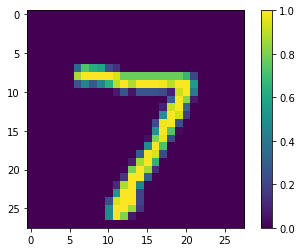

In [21]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [22]:
test_labels[0]

7

In [23]:
predictions = network.predict(test_images)

313/313 [==============================] - 1s 2ms/step


##### (참고 Softmax) Softmax()는 각 Class에 속할 확률 정보를 제공함
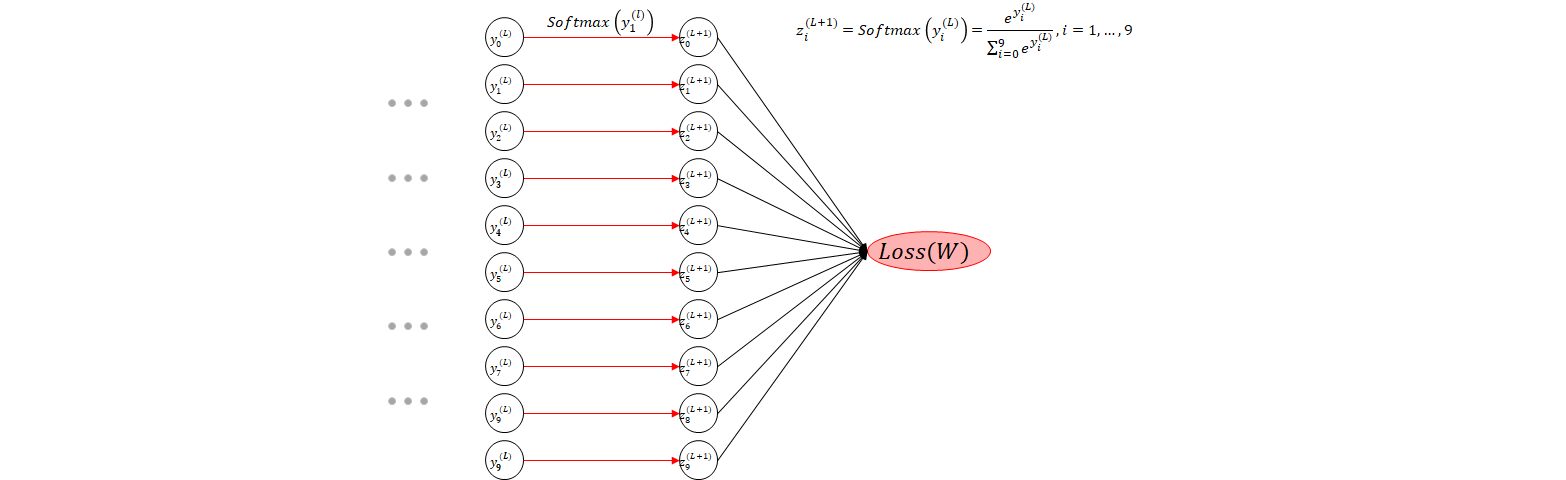
- $  z_{i}^{(L+1)} = Softmax \left( y_{i}^{(L)} \right) = \frac{e^{y_{i}^{(L)}}}{ \sum_{i=0}^{9} e^{y_{i}^{(L)}}}$   <br>
 $ \qquad $ (성질 1) $ \frac{e^{y_{i}^{(L)}}}{ \sum_{i=0}^{9} e^{y_{i}^{(L)}}} > 0 $ <br>
 $ \qquad $ (성질 2) $ \sum_{i=0}^{9} z_{i}^{(L+1)} = \sum_{i=0}^{9} \left( \frac{e^{y_{i}^{(L)}}}{ \sum_{i=0}^{9} e^{y_{i}^{(L)}}} \right) = \frac{\sum_{i=0}^{9} e^{y_{i}^{(L)}}}{ \sum_{i=0}^{9} e^{y_{i}^{(L)}}} = 1  $

In [24]:
predictions[0]

array([1.32661753e-12, 1.65054873e-12, 1.09298834e-10, 5.91412466e-08,
       1.38671099e-15, 1.77045448e-10, 2.52671698e-17, 1.00000000e+00,
       9.02873154e-13, 5.28841682e-09], dtype=float32)

In [25]:
import numpy as np
np.argmax(predictions[0])

7

- 학습된 Model은 입력된 image가 숫자 7이라고 가장 확신하고 있음
- 이 예측이 맞는지 test label을 확인해 봄

In [26]:
test_labels[0]

7